#### Predictive Model And Evaluation

In [2]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size':14})
cwd = os.getcwd()
dataset_path = cwd+"/filtered_customer_booking.csv"
df = pd.read_csv(dataset_path,index_col=0)

In [3]:
df = df.reset_index(drop= True)

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


Transforing the categorical columns into numerical using one hot encoding

In [5]:
df_final = df

In [6]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [7]:
df_final

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [9]:
#droping categorical variables
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)


In [10]:
label = df['booking_complete']

In [11]:
df_final = df_final.drop('booking_complete', axis=1)

In [12]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


#### Normalizing the values 

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit and transpose the data
scaled_df = scaler.fit_transform(df_final)

c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [14]:
#created a dataframe with scaled data
scaled_data = pd.DataFrame(scaled_df,columns=df_final.columns)

In [15]:
#Add the labels to the Scaled dataframe
scaled_data['label'] = label

In [16]:
scaled_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400594,1.964979,-0.119575,-0.381719,1.096713,0.703619,-0.649929,-0.863380,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
1,-0.579556,0.301151,-0.089155,-1.120754,1.096713,-1.421224,-0.649929,-0.863380,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
2,0.400594,1.754227,-0.028314,1.465867,-0.408681,0.703619,1.538629,-0.863380,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
3,-0.579556,0.123676,0.245467,-0.935995,1.096713,-1.421224,-0.649929,1.158238,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
4,0.400594,-0.186906,-0.028314,1.096350,-0.408681,0.703619,-0.649929,1.158238,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400594,-0.641685,-0.515037,-0.012202,1.096713,0.703619,-0.649929,1.158238,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
49978,-0.579556,0.290058,-0.515037,-0.935995,1.598511,-1.421224,-0.649929,-0.863380,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
49979,-0.579556,-0.674962,-0.515037,2.389660,1.096713,-1.421224,-0.649929,1.158238,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
49980,-0.579556,-0.774792,-0.515037,0.357315,-1.412277,0.703619,-0.649929,1.158238,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0


#### Correlation Matrix

<Axes: >

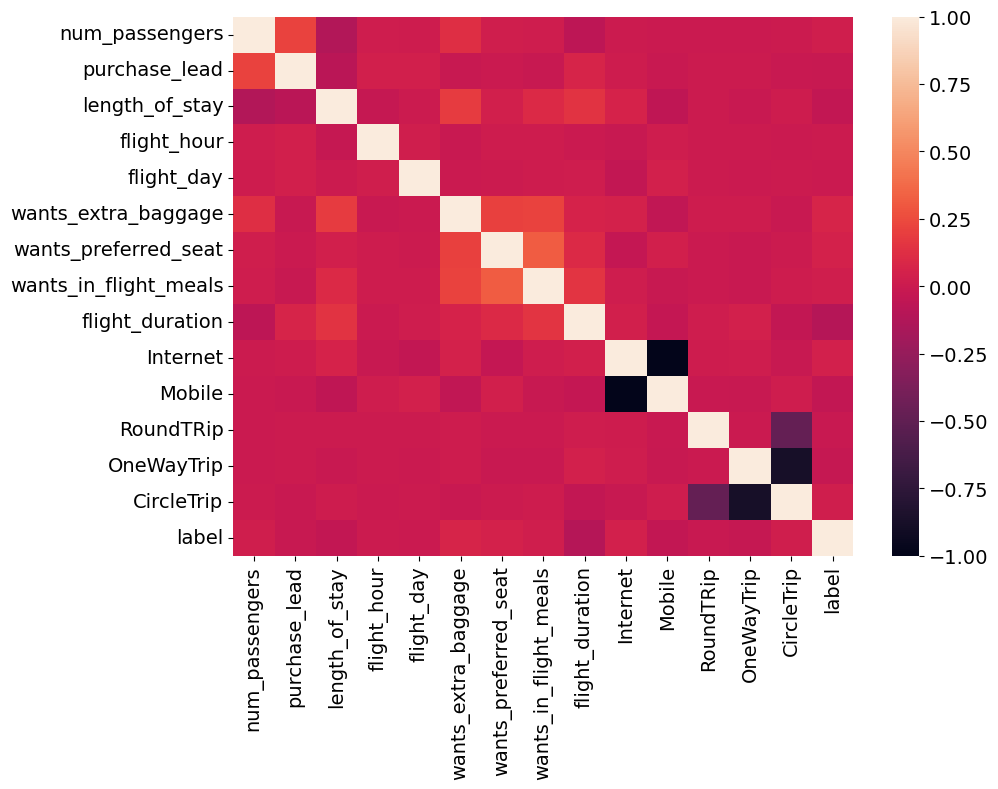

In [17]:
corr = scaled_data.corr()
plt.figure(figsize=(10,7))

#plot heat map
sns.heatmap(corr)

#### spliting the data into train and test data set

In [18]:
from sklearn.model_selection import train_test_split

X = scaled_data.iloc[:,:-1]
y = scaled_data['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)


In [19]:
# importing libraries for modeling and evaluation of performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

Create functions to fit and predict the values of whether customer would complete the booking.
Also functions with metrics to evaluate the model prediction.


In [20]:
def model_fit_predict(model,X,y,X_predict):
    model.fit(X,y)
    return model.predict(X_predict)

def acc_score(y_true,y_pred):
    return accuracy_score(y_true,y_pred)

def pre_score(y_true,y_pred):
    return precision_score(y_true,y_pred)

def f_score(y_true,y_pred):
    return f1_score(y_true,y_pred)

#### Random Forest Classifier

In [21]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

#### Checking Training Accuracy

In [22]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f_score(y_train,y_pred_train),2)

#Accuracy score for training data
acc = round(acc_score(y_train,y_pred_train),2)

#precision score for training data
pre = round(pre_score(y_train,y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")


Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9337001375515819

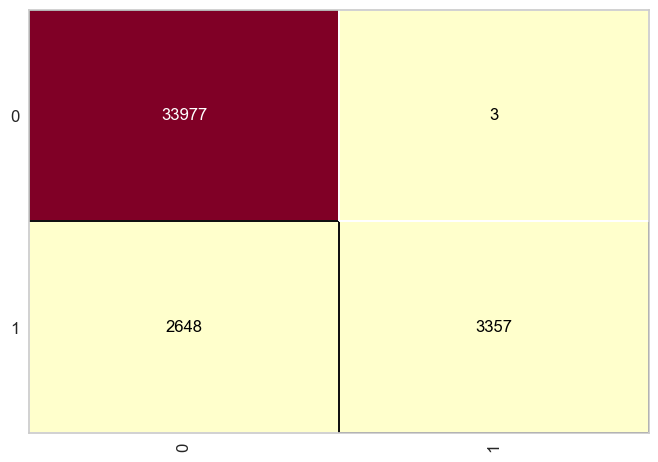

In [23]:

cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

#### Checking Testing Data

In [24]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.5 and 0.06 respectively


0.8528558567570271

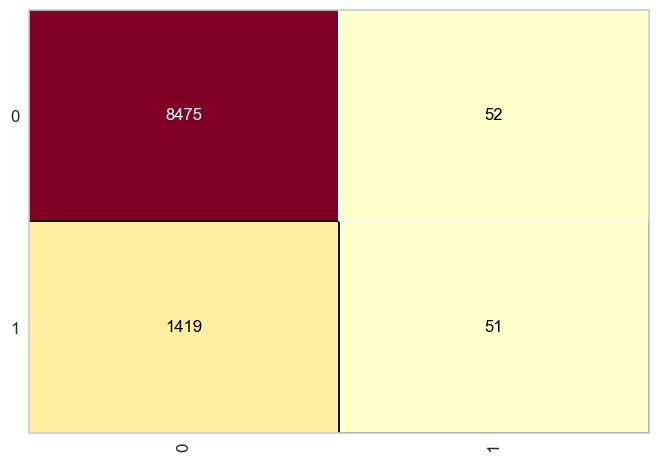

In [25]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

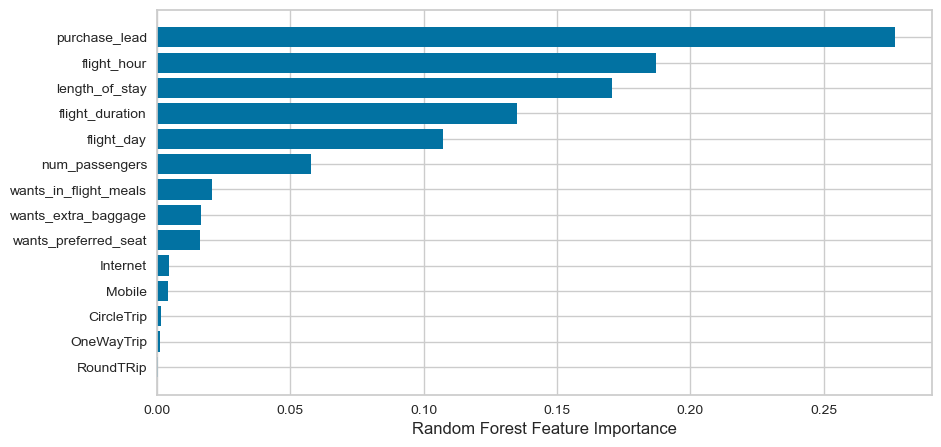

In [27]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_data.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

In [28]:
scaled_data.label.value_counts()

label
0    42507
1     7475
Name: count, dtype: int64

In [30]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_data[scaled_data.label ==0].sample(n=8000)

In [31]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_data[scaled_data.label==1], scaled_df_0], ignore_index=True)

In [32]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [33]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [34]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [35]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.61, 0.61, 0.59, 0.64 and 0.6 respectively


0.6138933764135702

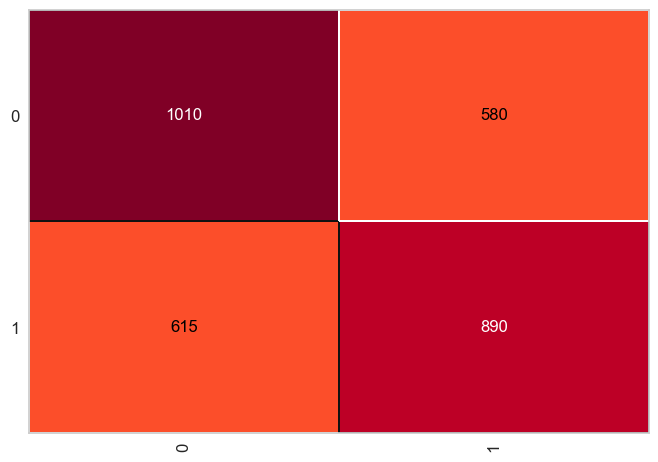

In [36]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

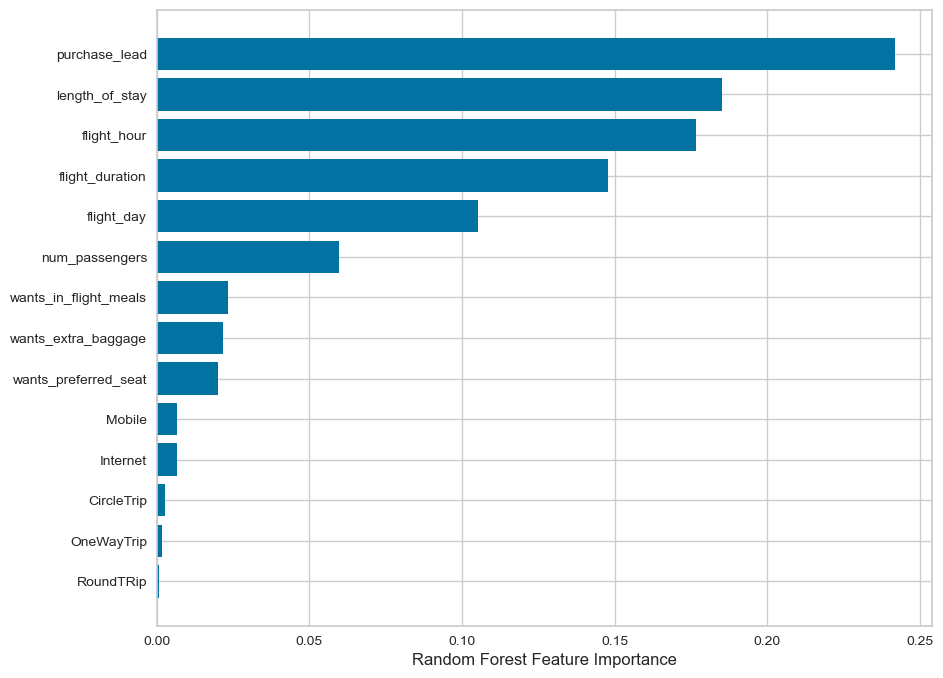

In [38]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_data.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")